# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/cbarond/cs39aa_project/blob/main/project_part2.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cbarond/cs39aa_project/blob/main/project_part2.ipynb)


In [3]:
# import all of the python modules/packages you'll need here
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("emotion")

Found cached dataset emotion (/home/caelan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
dataset.set_format(type='pandas', columns=['text','label'])

X_train_raw = dataset['train']['text'].copy()
Y_train = dataset['train']['label'].copy()
X_valid_raw = dataset['validation']['text'].copy()
Y_valid = dataset['validation']['label'].copy()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (16000, 15186)


numpy.ndarray

accuracy (on X_train): 0.9981


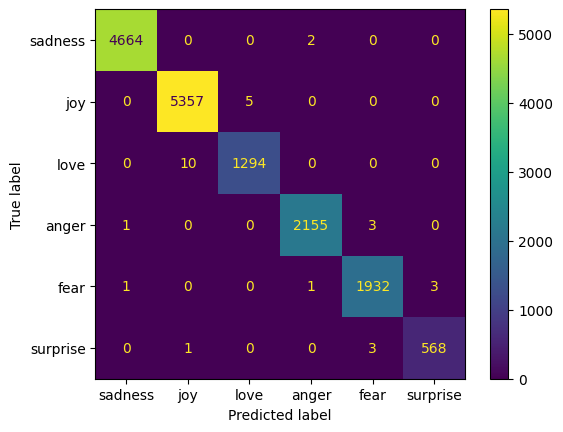

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_jobs=-1)
model = model.fit(X_train, Y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(Y_train, predictions_train), display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(Y_train, predictions_train):.4f}")

In [19]:
X_valid = tfidf_vectorizer.transform(X_valid_raw).toarray()
print(f"X_val.shape = {X_valid.shape}")
type(X_valid)

X_val.shape = (2000, 15186)


numpy.ndarray

accuracy (on X_train): 0.8740


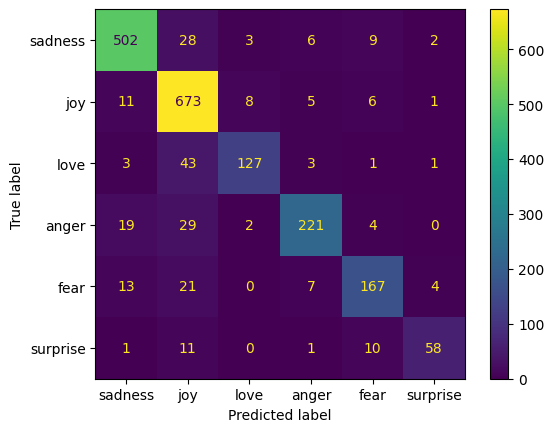

In [20]:
predictions_val = model.predict(X_valid)
disp = ConfusionMatrixDisplay(confusion_matrix(Y_valid, predictions_val), display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(Y_valid, predictions_val):.4f}")